In [2]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
import torch


mnist_transform = transforms.Compose(
    [
        transforms.ToTensor(), # torchvision 이 오직 PIL Image 형태로만 받아 tensor 형태로 변환 필요
        transforms.Normalize(mean=(0.5,), std=(1.0,),)
    ]
)

In [3]:
import urllib.request
import gzip
import shutil
import os

# if

# Define the URLs for the MNIST dataset
urls = {
    "train-images-idx3-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz"
}

# Define the directory to save the dataset
dataset_dir = "content/MNIST/raw"
os.makedirs(dataset_dir, exist_ok=True)

# check if the dataset is already downloaded
if not all([os.path.exists(os.path.join(dataset_dir, filename.replace('.gz', ''))) for filename in urls.keys()]):
    print("The dataset files are already downloaded.")
    # Function to download and extract the dataset
    def download_and_extract(url, filename):
        filepath = os.path.join(dataset_dir, filename)
        print(f"Downloading {url} to {filepath}")
        urllib.request.urlretrieve(url, filepath)
        print(f"Extracting {filepath}")
        with gzip.open(filepath, 'rb') as f_in:
            with open(filepath.replace('.gz', ''), 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        os.remove(filepath)

    # Download and extract each file
    for filename, url in urls.items():
        download_and_extract(url, filename)

train_set = datasets.MNIST(
    root='content/', 
    train=True, 
    download=True, 
    transform=mnist_transform
    )

test_set = datasets.MNIST(
    root='content/', 
    train=False, 
    download=True, 
    transform=mnist_transform
    )

In [4]:
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=8, shuffle=False, num_workers=2)

In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [6]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

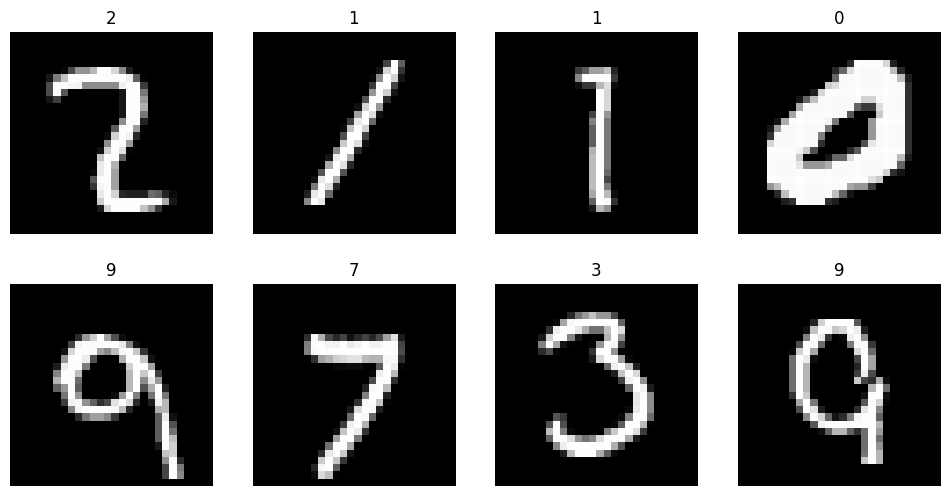

In [7]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()

In [8]:
import torch.nn as nn

In [9]:
input = torch.randn(128, 20)
print(input)

tensor([[-0.4109, -1.0219, -0.9429,  ..., -0.2202,  1.1391,  0.0637],
        [-0.9117, -0.1457, -0.5271,  ...,  0.0653, -0.4033, -0.7849],
        [ 0.7550, -0.1554, -1.3216,  ..., -0.6211,  0.2648, -3.3926],
        ...,
        [ 1.1455,  0.9376,  0.7013,  ...,  1.5261,  1.2000, -1.2060],
        [ 1.5233,  0.2542,  0.2777,  ...,  1.1938, -0.7505, -0.2472],
        [-0.8583, -0.6909,  0.7940,  ...,  0.4356,  0.4509,  0.3574]])


In [11]:
m = nn.Linear(20, 30)
print(m)

output = m(input)
print(output)
print(output.size()) # torch.matmlu(input, m.weight.t()) + m.bias => 128 x 30

Linear(in_features=20, out_features=30, bias=True)
tensor([[ 1.1804,  0.3610, -0.5805,  ..., -0.1903, -1.0409,  0.0220],
        [ 0.3764,  0.6032,  0.3143,  ...,  0.0594, -0.0328, -0.0966],
        [ 0.3046,  0.0249, -0.8694,  ..., -0.5221,  0.2994,  0.2249],
        ...,
        [ 0.9797,  0.2478, -1.0251,  ...,  0.7757, -0.1945,  0.1140],
        [ 0.2214,  0.2512, -0.5829,  ...,  0.3971, -1.1867, -0.9278],
        [-0.4142,  0.6603,  0.3042,  ...,  0.1129, -0.4522, -0.4119]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [23]:
input = torch.randn(20, 16, 50, 20)
print(input.size())

torch.Size([20, 16, 50, 20])


In [24]:
import torch.nn as nn

conv1 = nn.Conv2d(16, 33, 3, stride=2)
conv2 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
conv3 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(conv3)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [25]:
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 30])
